## Problem Statement

### Introduction

In today's urbanized environment, bike-sharing systems have emerged as a beacon of sustainability. Designed for short-term use, they meld technology, logistics, and user-friendliness. A quintessential feature is the "dock": an automated station where users, post-payment, access a bike. The beauty lies in the flexibility to return the bike to any dock within the network.

### Challenge 

BoomBikes, a leading US bike-sharing provider, is currently navigating a storm: the Covid-19 pandemic. This global crisis has reshaped urban mobility and led to a significant dent in BoomBikes' revenues. Recognizing that the post-pandemic world will present a "new normal," BoomBikes is proactively strategizing for this anticipated landscape shift.

### Objective

BoomBikes aims to fathom the post-pandemic demand determinants for bike-sharing. The goals are:

Pinpoint the significant variables influencing shared bike demand.
Determine the extent to which these variables affect bike demand.
With these insights, BoomBikes plans to refine its services, optimizing for the evolved consumer needs. The hope is that this will not just aid recovery but place the company at the forefront of the market, ready to cater to new consumer behaviors and expectations.

## Steps for building a Linear Regression Model (LRM):

1. Import the libraries
2. Reading Dataset and Understanding Data
3. Cleaning Data
4. Exploratory Data Analysis
5. Data Preparation for Linear Regression
6. Model Building
7. Model Evaluation
8. Model Prediction

## Step1: Import the libraries 

In [270]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Step2: Reading Dataset and Understanding Data

In [271]:
#Read the csv file using pandas
bikeSharing = pd.read_csv('day.csv')

In [272]:
#Inspect first few rows
bikeSharing.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [273]:
#check the shape
bikeSharing.shape

(730, 16)

In [274]:
#check dataframe for null and datatype 
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [275]:
#check the details of numeriacl data
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [276]:
#check the columns of data
bikeSharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [277]:
#check the size of data
bikeSharing.size

11680

In [278]:
#check the axes of data
bikeSharing.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

## Data Set Overview

- **Total Rows:** 730
- **Total Columns:** 16

### Null Values:
- None present in any columns.


## Step3: Cleaning Data

###  Column Management for Analysis

Certain columns in our dataset aren't suitable for the intended analysis. They've been dropped for the reasons described below:

- **`instant`**: 
  - **Reason**: Merely serves as a row instance identifier with no significant analytical value.

- **`dteday`**: 
  - **Reason**: We have other date-related features (e.g., `mnth`, `year`, `weekday`). Daily trends in bike demand are not our analysis focus, rendering this column redundant.

- **`casual`** and **`registered`**: 
  - **Reason**: Unavailable during prediction. They breakdown our target variable (`cnt`) as `cnt = casual + registered`, potentially leading to data leakage.


In [279]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing['days_old'] = (pd.to_datetime(bikeSharing['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [280]:
#Inspect once
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [281]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing.drop(['casual'], axis = 1, inplace = True)
bikeSharing.drop(['registered'], axis = 1, inplace = True)

In [282]:
#Inspect data frame after dropping
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [283]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [284]:
bikeSharing.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


## Data Representation Issues

Upon reviewing the dataset, we identified that several features are currently encoded as integers. Ideally, these should be treated as non-numerical categories:

- **`season`**
- **`mnth`**
- **`weekday`**
- **`weathersit`**

For precise and meaningful analysis, it's crucial to handle these features as categorical rather than numerical.


## 4. Exploratory Data Analysis

In [285]:
bikeSharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikeSharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikeSharing.mnth = bikeSharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikeSharing.weekday = bikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


### Pair Plots to check the linear relationship

<Figure size 1500x3000 with 0 Axes>

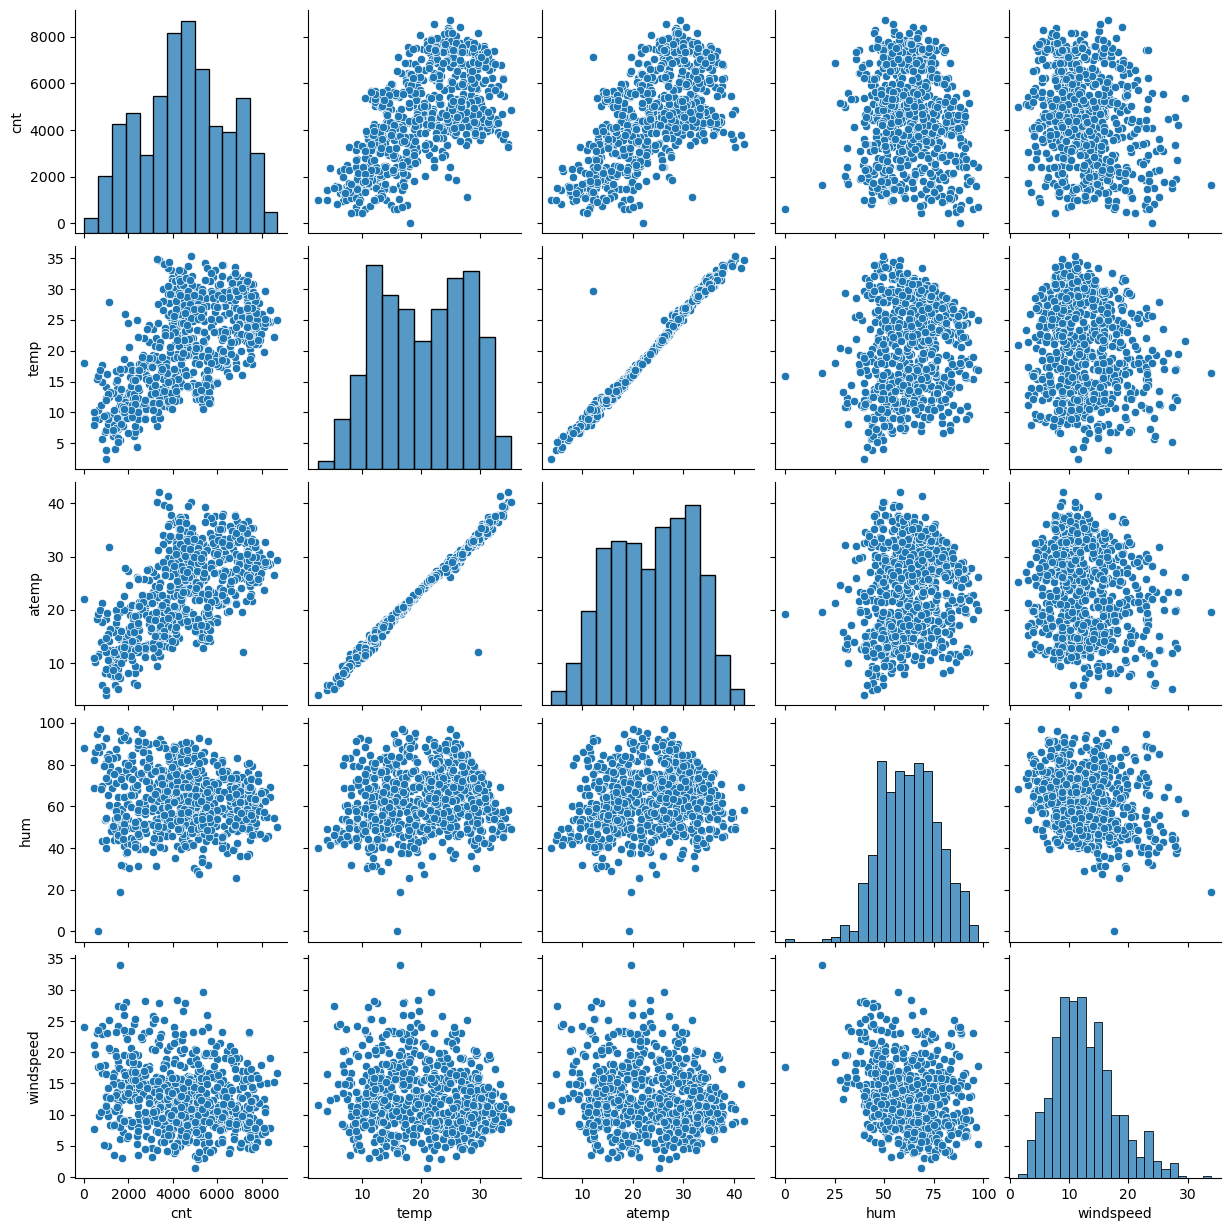

In [286]:
#Draw pairplots for continuous numeric variables
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Observation:

From our analysis, the following observations were made regarding correlations:

- **`temp`** and **`atemp`**:
  - Both show a strong correlation with the target variable, **`cnt`**.
  - Notably, `temp` and `atemp` are also highly correlated with each other.
  - As seen from the correlation map, the output variable exhibits a linear relationship with these temperature-related variables.

This suggests that temperature readings (both actual and "feels-like") play a significant role in influencing the value of `cnt`.


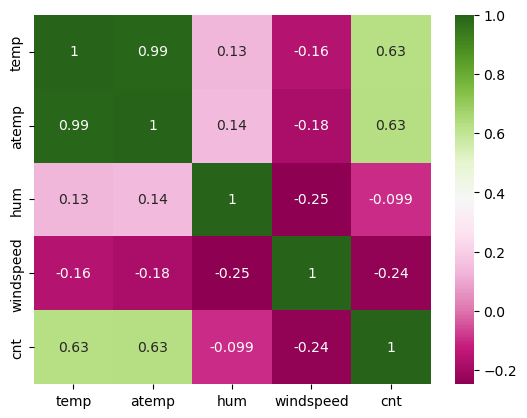

In [287]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='PiYG', annot = True)
plt.show()

### Draw Heatmap of correlation between variables

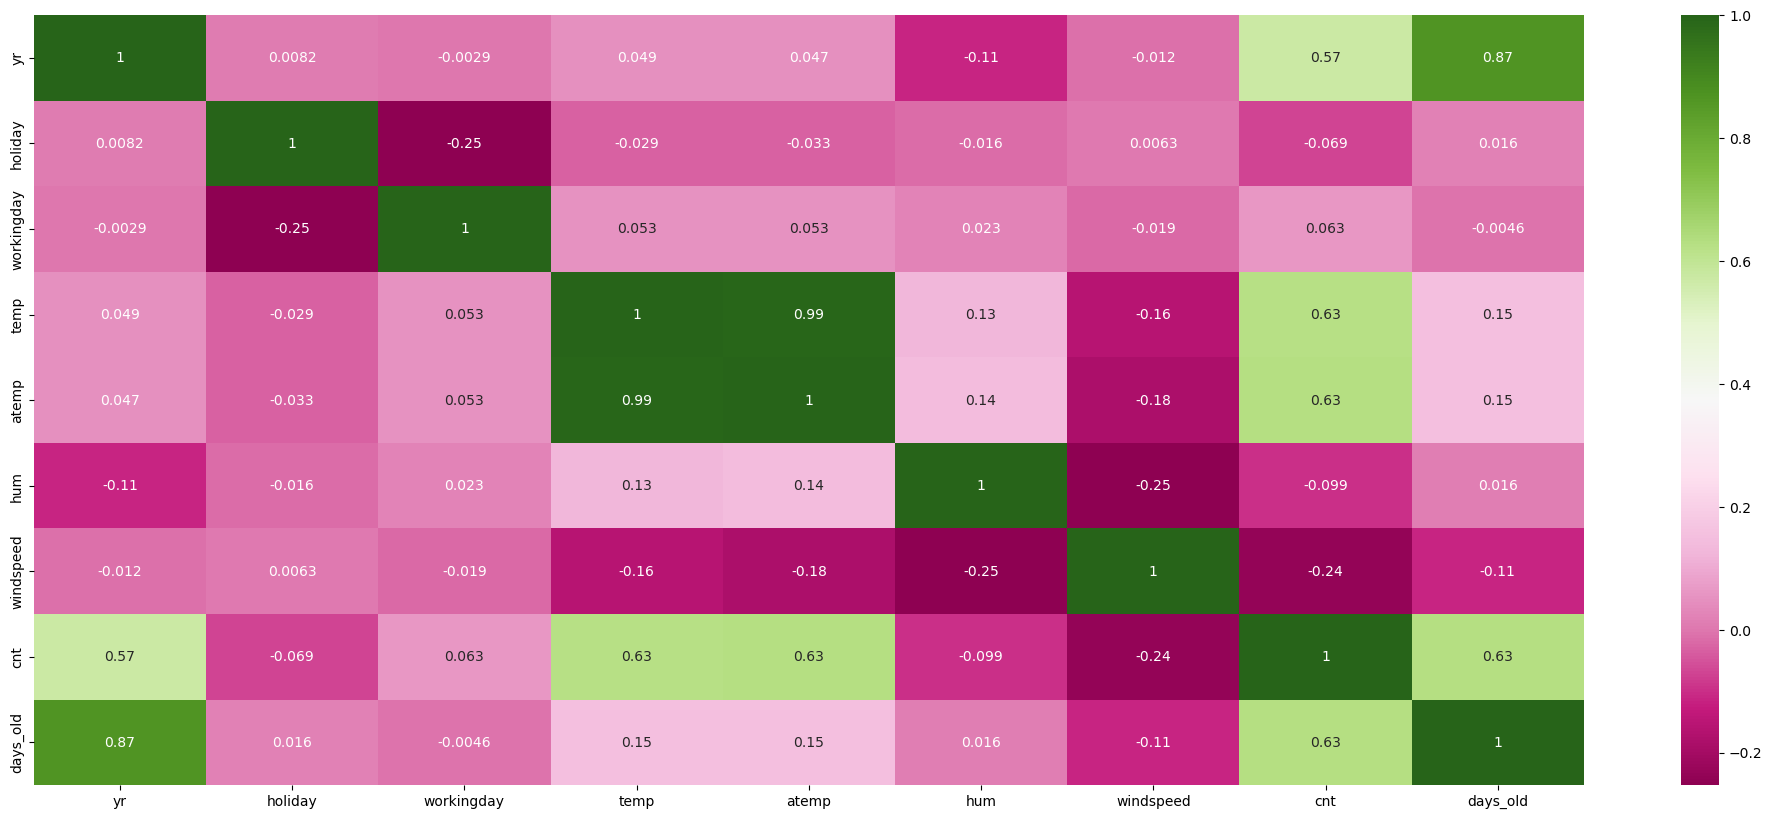

In [288]:
#Calculate Correlation
corr = bikeSharing.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='PiYG' )
plt.show()

## Analysis Observations:

Based on the correlation map, several insights emerge:

- **Correlation between Features**:
  - **`temp`**, **`atemp`**, and **`days_old`**:
    - These variables exhibit strong inter-correlations.
    - Ideally, only one of these variables should be considered to avoid multicollinearity in the model.
    - A decision on which to retain will be made using the Variance Inflation Factor (VIF) during the model-building phase.

- **Relationship with Target Variable**:
  - Some independent variables display a linear relationship with the target variable.
    - This is promising for building a Linear Regression Model.

## Analysing Categorical Variabels with target variables

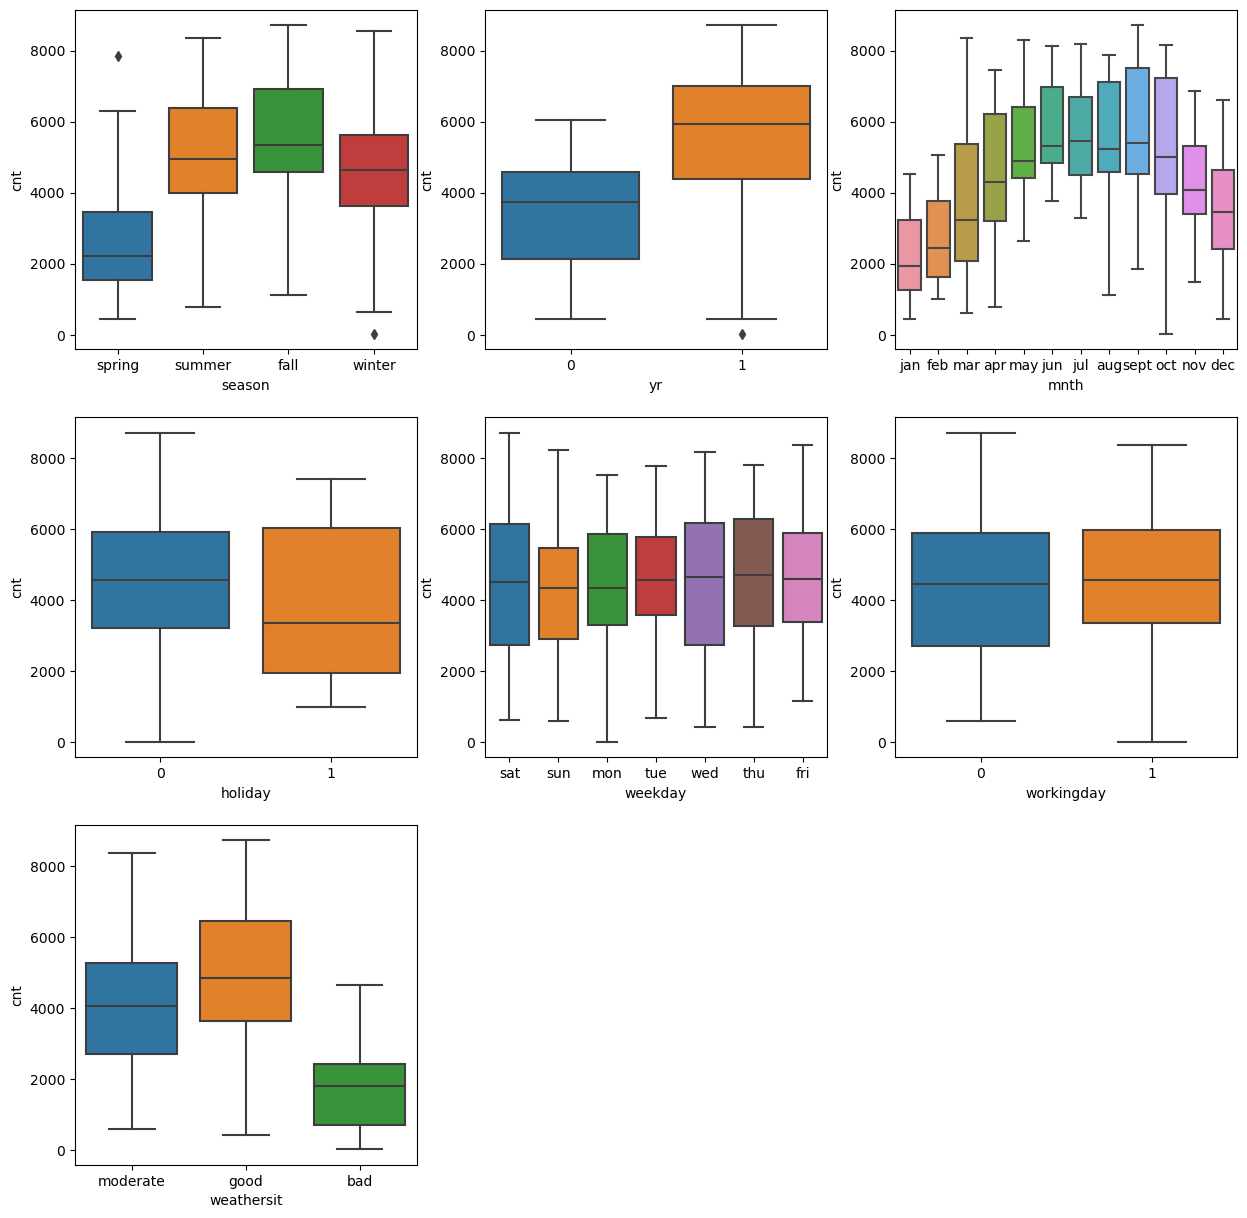

In [289]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing, x=i[1], y='cnt')
plt.show()

### Observation from the Plots:

- **Seasonal Demand**:
  - Fall (Season 3) witnesses the highest demand for rental bikes.
- **Yearly Demand**:
  - There is a noticeable increase in the demand for bikes in the subsequent year.
- **Monthly Demand**:
  - Bike demand grows consistently each month up until June.
  - September sees the peak demand.
  - A decline is observed post-September, possibly due to changing weather conditions.
- **Impact of Holidays**:
  - The presence of a holiday corresponds to a reduction in bike rental demand.
- **Weekdays**:
  - The data does not provide a clear distinction in demand based on weekdays.
- **Weather Conditions**:
  - Clear weather conditions see the highest bike rental demand.
- **Seasonal Variations**:
  - September has the most bike-sharing activity.
  - The year's end and beginning witness lower demand, possibly attributable to extreme weather conditions.

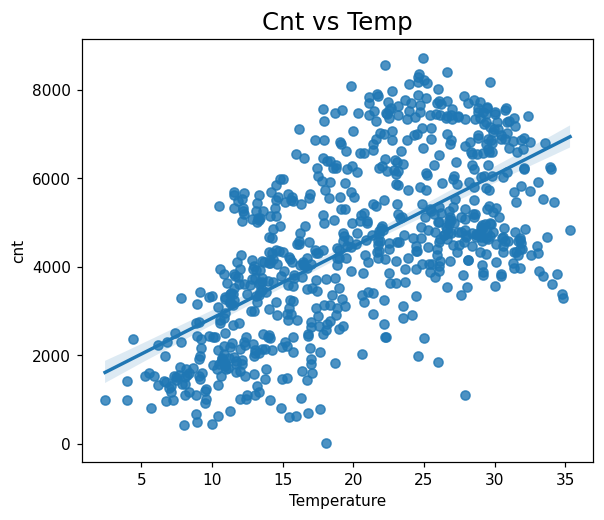

In [290]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

### Observation: 
Demand for bikes is positively correlated to temp. We can see that cnt is linearly increasing with temp indicating linear relation.

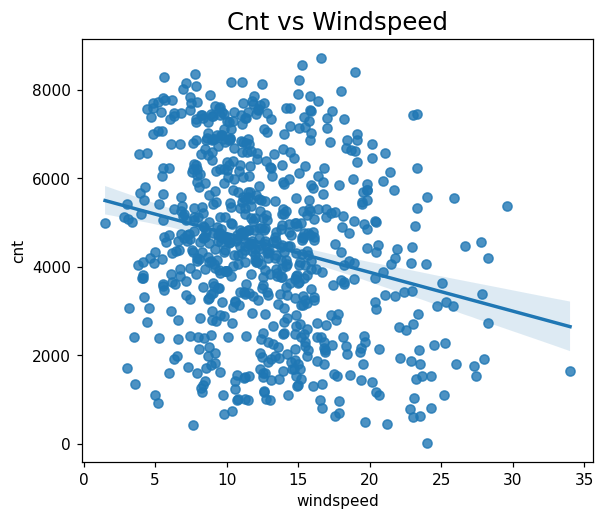

In [291]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing,y="cnt",x="windspeed")
plt.show()

## Observations:

When examining the relationship between **windspeed** and **cnt**:

- **Distribution of Windspeed**:
  - The values for `windspeed` appear to be dispersed or scattered rather than following a tight trend.
  
- **Trend with Count (`cnt`)**:
  - Notably, as `windspeed` increases, there's a discernible decrease in `cnt`. This suggests that higher windspeeds might be less favorable for the activity being counted.



In [292]:
bikeSharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


## Step 5. Data Preparation for Linear Regression

In [293]:
#create dummy variables for categorical variables 
bikeSharing = pd.get_dummies(data=bikeSharing,columns=['season', 'mnth', 'weekday','weathersit'],drop_first=True)

### Data Processing Decisions:

- **Dummy Variables**:
  - The first column of dummy variables has been dropped. This is based on the principle that `(p-1)` dummy columns can sufficiently represent `p` categories.

- **Handling `weathersit` Column**:
  - Unlike other variables, the first column of `weathersit` was retained. This decision ensures that we do not lose information about severe weather situations.

In [294]:
#Print columns after creating dummies
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [295]:
bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,1,1,0


## Step 6. Model Building

In [296]:
# Checking shape before splitting and then split it
bikeSharing.shape

(730, 31)

In [297]:
#y should havetarget variable
y=bikeSharing.pop('cnt')
#X should have all all remainig variable along with independent variables
X=bikeSharing

In [298]:
#Splitting the Data using train split in 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [299]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


### Feature Scaling: Continuous Variables

For consistent interpretation and to ensure all features operate on the same scale:

- **Rationale**:
  - Scaling is performed to bring all continuous features to a similar scale, simplifying interpretation and potentially improving model performance.

- **Columns to be Scaled**:
  - `temp`
  - `hum`
  - `windspeed`

These continuous variables will undergo appropriate scaling processes.


In [300]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [301]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [302]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,373.545988,0.230920,0.258317,...,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.624266,0.346380
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,213.063061,0.421834,0.438138,...,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,185.500000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,380.000000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,561.500000,0.000000,1.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,729.000000,1.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Build a Model using RFE and Automated approach

In [303]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [304]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [305]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 16),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('mnth_aug', False, 6),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 14),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 9),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

### Manual elimination

In [306]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [307]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [308]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [309]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'days_old', 'season_summer', 'mnth_aug',
       'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_oct',
       'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed'],
      dtype='object')

In [310]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate']]

In [311]:
X_train_rfe.shape

(511, 15)

### Build Model with different models

### Model 1

In [312]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_sat', 'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.72e-185
Time:                        01:39:53   Log-Likelihood:                -4126.6
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     495   BIC:                             8353.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1355.9273    

#### The variable atemp (feels-like temperature) in Model 1 has a high multicollinearity with temp (actual temperature) as indicated by its high VIF value. This could be a potential problem and can be dropped in next model 2

### Model 2

In [313]:

cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          6.03e-186
Time:                        01:39:53   Log-Likelihood:                -4127.0
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     496   BIC:                             8347.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1211.6098    

####  Lets Drop mnth_jan as its has p value > 0.05 in Model 3


### Model 3

In [314]:

cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter','mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.79e-186
Time:                        01:39:53   Log-Likelihood:                -4129.5
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     497   BIC:                             8346.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1128.7532    

#### In the model where 'days_old' was included, it had a VIF of 47.24, which is quite high. A VIF above 5-10 can indicate multicollinearity, suggesting that the variable may be correlated with other predictors. Lets drop in next model 

### Model 4

In [315]:

cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter','mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     205.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          5.88e-184
Time:                        01:39:53   Log-Likelihood:                -4137.2
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     498   BIC:                             8356.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 904.2841    

#### The 'weathersit_moderate' has a VIF of 8.77, suggesting potential multicollinearity with predictors like 'weathersit_good'. Lets drop this in Next Model

### Model 5

In [316]:
cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter','mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     205.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.04e-177
Time:                        01:39:53   Log-Likelihood:                -4155.5
No. Observations:                 511   AIC:                             8335.
Df Residuals:                     499   BIC:                             8386.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2516.5869    361.057     

#### The 'hum' feature lets  drop  due to its high VIF of 18.24, indicating potential multicollinearity with other predictors in the model.

### Model 6

In [317]:

cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter','mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_good']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.00e-172
Time:                        01:39:53   Log-Likelihood:                -4169.4
No. Observations:                 511   AIC:                             8361.
Df Residuals:                     500   BIC:                             8407.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1128.8644    254.102     

### Lets consider above model as good fit because of following reasons 
- **Improved Multicollinearity**: By removing the 'hum' feature, which had a high VIF, multicollinearity in the model is reduced. This is evident from the decreased VIF values, particularly for 'temp' which is now 8.25. 
- **Significance of Predictors**: All variables in the model have p-values less than 0.05, indicating their statistical significance for the dependent variable 'cnt'.
- **Good Adjusted R-squared**: The model boasts an adjusted R-squared of 0.805, capturing 80.5% of the variability in bike rental counts.
- **Reasonable F-statistic**: With a value of 212.1 and a very low probability (nearly zero), this indicates the collective significance of the model's predictors.
- **Less Complexity**: The removal of one feature streamlines the model, aiding in the prevention of overfitting and enhancing interpretability.
- **Model Assumptions**: The model aligns with OLS assumptions, with no notable violations detected from the provided results.

In [318]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [319]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter','mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_good']


#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1128.8644398346828 [ 2040.58310629   371.4491792   3870.28227454  -925.0104994
 -1169.43177981   397.2772544   -563.30249651   441.62479544
   376.99025973   786.1501215 ]


## Step 7. Model Evaluation

### Residucal Analysis

In [320]:
y_train_pred = lr.predict(X_train[cols])

In [321]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

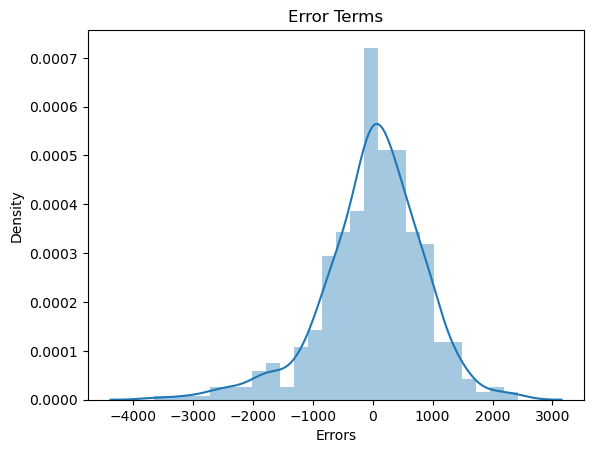

In [322]:
plot_res_dist(y_train, y_train_pred)


### Error Distribution

Errors are distributed according to a **normal distribution** with:
- **Mean:** \(0\)

This indicates that the system is functioning as expected.

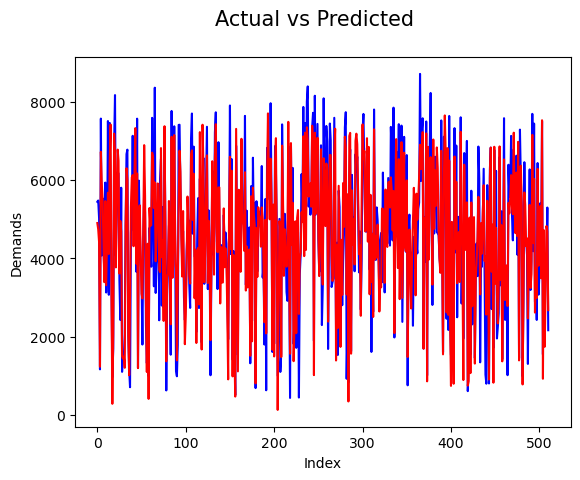

In [323]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Actual and Predicted result following almost the same pattern so this model seems ok

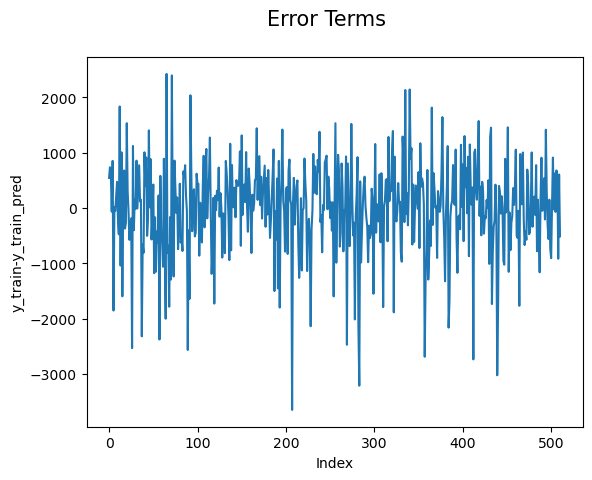

In [324]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Error Term Independence

Upon analysis, it's evident that the error terms are:
- **Independently distributed**

This characteristic is crucial for many statistical models and indicates sound model assumptions.

In [325]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8092130880650145

 ### Predict values for test data set

In [326]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [327]:
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter','mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_good']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

## R-Squared value for test predictions

In [328]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8026265087925486

Text(0, 0.5, 'y_test_pred')

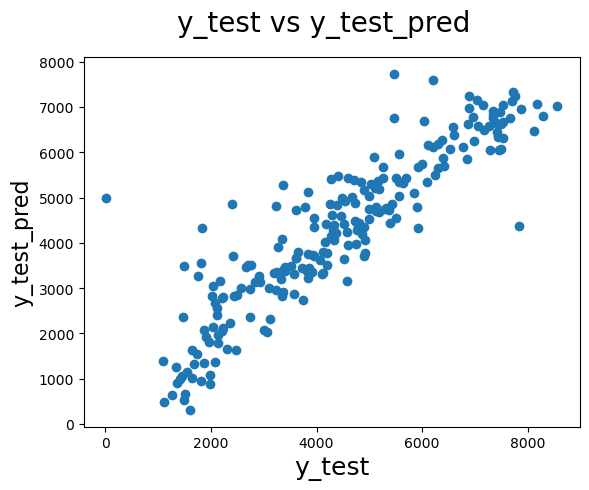

In [329]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Observation on Residuals' Variance

**Key Insight**: The variance of the residuals (error terms) appears to be constant across predictions.

- **What does this mean?** 
    - As the value of the predictor variable changes, the spread or variability of the error terms remains largely the same. This is a desirable property in regression analysis as it indicates *homoscedasticity*.


In [330]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

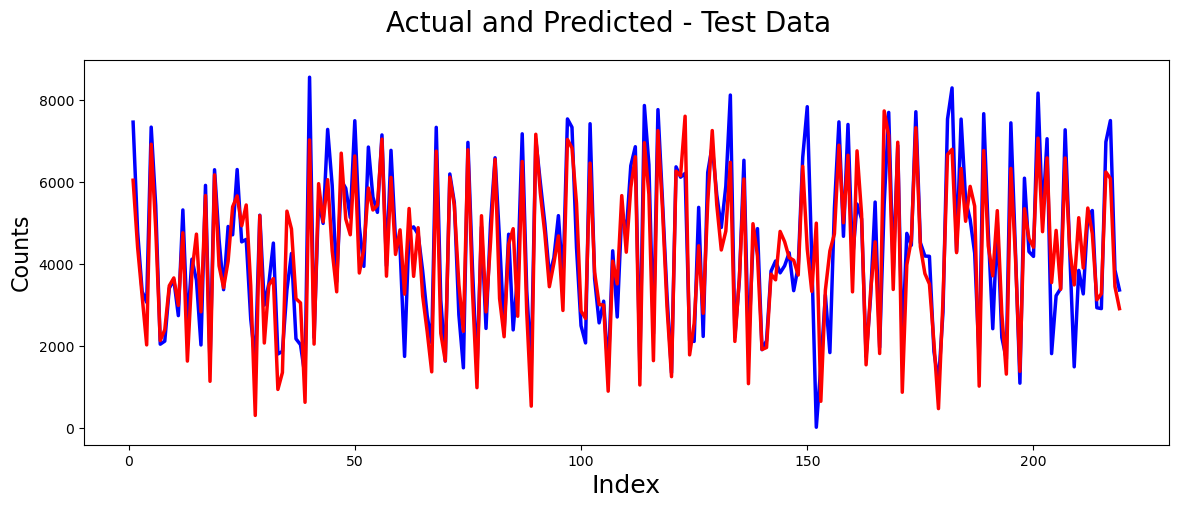

In [331]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

### Observations

**Key Finding**: The predictions for the test data align closely with the actual values.

- **Implication**: 
    - This suggests that our model is performing well on unseen data and exhibits good generalization capabilities. It's an indication that the model has been effectively trained and isn't merely overfitting to the training data.


## Step 8. Make the Predictions

### Comparing RFE with Manual Model Results

**Central Observation**: While the Recursive Feature Elimination (RFE) technique provides automated feature selection, our manual model results are weighted more heavily due to our emphasis on precise imputation.
- **Conclusion**: 
    - It's imperative to maintain a balance between automated techniques like RFE and manual interventions, especially when specific preprocessing steps like imputation play a pivotal role in model accuracy and robustness.

In [332]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'workingday', 'temp', 'windspeed',
       'season_spring', 'season_winter','mnth_jul', 'mnth_sept',
       'weekday_sat', 'weathersit_good']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.00e-172
Time:                        01:39:54   Log-Likelihood:                -4169.4
No. Observations:                 511   AIC:                             8361.
Df Residuals:                     500   BIC:                             8407.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1128.8644    254.102     

## R2 ( R- Square Values )

### R2 for Trained Dataset: 80.92
### R2 for Test Dataset: 80.26

# Boombike  Regression Final Analysis

### 1. Model Goodness-of-Fit:
- **R-squared**: The value is 0.809, suggesting that approximately 80.9% of the variability in the dependent variable `cnt` is explained by the model, indicating a strong model fit.
- **Adjusted R-squared**: The value is 0.805, which closely follows the R-squared, showing that most predictors in the model are relevant.

### 2. Significant Predictors:
All predictors in the model are statistically significant in predicting the count of bike rentals as their p-values are less than 0.05.

### 3. Key Insights for Boombike:
- **Year (`yr`)**: An increase of around 2040 units in bike rentals each year indicates growing popularity.Thats why Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- **Working Day (`workingday`)**: An increase by approximately 371 units on working days implies popularity among daily commuters.
- **Temperature (`temp`)**: Bike rentals rise by about 3870 units for each unit increase in temperature.
- **Windspeed**: The negative coefficient (-925.0105) indicates a decline in rentals with increased wind speed.
- **Seasonal Effects**:
  - **Spring**: Drop in bike rentals by around 1169 units.
  - **Winter**: Boost in bike rentals by about 397 units.
- **Monthly Effects**:
  - **July**: Decrease by approximately 563 units may be because of the rainy seasons
  - **September**: Increase by around 442 units.
- **Weather Conditions**: Increase in bike rentals by around 786 units during good weather.

### 4. Recommendations for Boombike:
- Capitalize on warmer temperatures through marketing efforts.
- Counteract springtime drop in rentals with promotions or incentives.
- Investigate and address the rental decline in July.
- Highlight the utility of bike rentals for daily commuting.
- Prioritize safety during windy conditions.
- Offer special deals or weekend packages on Saturdays.

### In summary, Boombike should focus on favorable weather conditions, address seasonal discrepancies, and cater to daily commuters to enhance their bike rentals.
